In [37]:
import gymnasium as gym

max_episode_steps = 200
env = gym.make('FetchReach-v2', max_episode_steps=max_episode_steps, autoreset=True)

In [38]:
env.action_space, env.observation_space

(Box(-1.0, 1.0, (4,), float32),
 Dict('achieved_goal': Box(-inf, inf, (3,), float64), 'desired_goal': Box(-inf, inf, (3,), float64), 'observation': Box(-inf, inf, (10,), float64)))

In [39]:
class RandomAgent:
    def get_action(self, state):
        return env.action_space.sample()

In [40]:
env.reset()

({'observation': array([ 1.34185486e+00,  7.49100508e-01,  5.34707205e-01,  2.00232294e-04,
          6.92377335e-05, -3.25336729e-06, -2.19655130e-09,  5.16581247e-06,
          4.76882452e-06, -2.31810359e-06]),
  'achieved_goal': array([1.34185486, 0.74910051, 0.5347072 ]),
  'desired_goal': array([1.35821998, 0.73492242, 0.51375856])},
 {})

In [41]:
env.step(env.action_space.sample())

({'observation': array([ 1.32455141e+00,  7.19558562e-01,  5.43701129e-01,  0.00000000e+00,
          0.00000000e+00, -1.53003680e-02, -2.50606894e-02,  7.71691679e-03,
          6.07398180e-04,  4.57102607e-04]),
  'achieved_goal': array([1.32455141, 0.71955856, 0.54370113]),
  'desired_goal': array([1.35821998, 0.73492242, 0.51375856])},
 -0.0,
 False,
 False,
 {'is_success': 1.0})

In [42]:
random_agent = RandomAgent()

In [43]:
from tqdm import tqdm

def play_game(agent):
    state = env.reset()
    done = False
    score = 0.0
    for i in range(max_episode_steps):
        action = agent.get_action(state)
        next_state, reward, done, _, _ = env.step(action)
        
        score += reward
        state = next_state
        if done:
            break
    return score

100%|██████████| 250/250 [01:13<00:00,  3.40it/s]


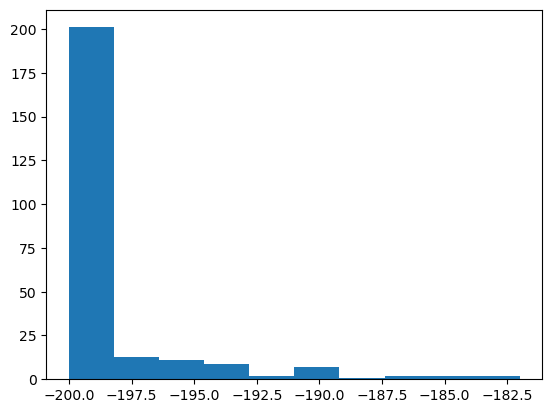

-198.668

In [51]:
import matplotlib.pyplot as plt

tests = []
for i in tqdm(range(250)):
    result = play_game(random_agent)
    tests.append(result)
    
plt.hist(tests) 
plt.show()
np.mean(tests)

In [45]:
state_dim = env.observation_space['observation'].shape[0]
actions_dim = env.action_space.shape[0]
state_dim, actions_dim

(10, 4)

In [46]:
from soft_actor_critic import SoftActorCritic
from replay_buffer import ReplayBuffer

agent = SoftActorCritic(state_dim, actions_dim)
replay_buffer = ReplayBuffer(10000)

In [47]:
def play_and_record(env, agent, buffer):
    state = env.reset()[0]
    # print(state)
    done = False
    score = 0
    for i in range(max_episode_steps):
        obs = state['observation']#.astype(np.float32)
        # print(obs)
        action = agent.choose_action(obs)
        # print(action)
        next_state, reward, done, _, _ = env.step(action)
        score += reward
        # print(obs, action, reward, next_state['observation'], done)
        buffer.add(obs, action, reward, next_state['observation'], done)
        
        if len(buffer) > batch_size:
            batch = replay_buffer.sample(batch_size)
            agent.learning_step(batch)
            
        state = next_state
        if done:
            break
    
    return score

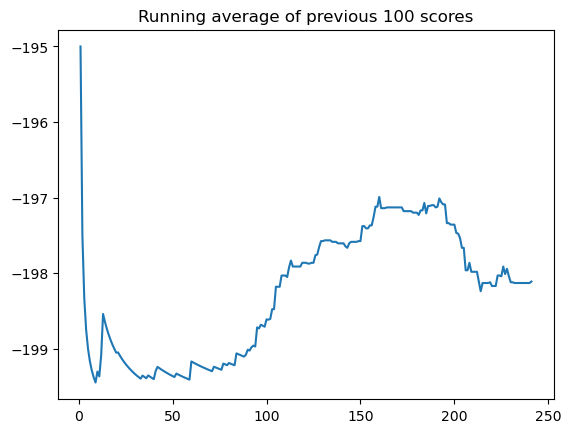

100%|██████████| 250/250 [10:11<00:00,  2.45s/it]


In [48]:
from tqdm import tqdm
import numpy as np
from utils import plot_learning_curve

n_episodes = 250
batch_size = 64
score_history = []
best_score = env.reward_range[0]

for i in tqdm(range(n_episodes)):
    score = play_and_record(env, agent, replay_buffer)
    # if len(replay_buffer) >= batch_size:
    #     batch = replay_buffer.sample(batch_size)
    #     agent.learning_step(batch)
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])
    if avg_score > best_score:
        best_score = avg_score
    if i % 10 == 0 and i > 0:
        print(f"iteration {i} score {score:.3f} avg_score {avg_score:.3f}")
        plot_learning_curve(i + 1, score_history) 

In [49]:
import torch
import torch.nn as nn
import numpy as np
from soft_actor_critic import SoftActorCritic
from replay_buffer import ReplayBuffer

In [50]:
class Actor(nn.Module):
    def __init__(self, state_dim, n_actions, hidden_dim)

SyntaxError: expected ':' (3202167893.py, line 2)

In [ ]:
class SAC(torch.nn.Module):
    def __init__(self, state_dim, n_actions, hidden_dim):
        self.n_actions = n_actions
        self.state_dim = state_dim
        self.hidden_dim = hidden_dim

        self.mlp = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, n_actions)
        )